Import

In [1]:
import os
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

Carrega Base

In [2]:
df = pd.read_csv("nelson.csv", header=[0])
df.head(5)

,Skeleton 016:LFTC X,Skeleton 016:LFTC Y,Skeleton 016:LFTC Z
0,-785.775269,958.105652,-1245.510986
1,-785.869995,958.078369,-1245.574097
2,-785.915771,958.087280,-1245.652832
3,-785.933716,958.090515,-1245.795898
4,-786.016113,958.077454,-1245.967285


Primeiras Analises

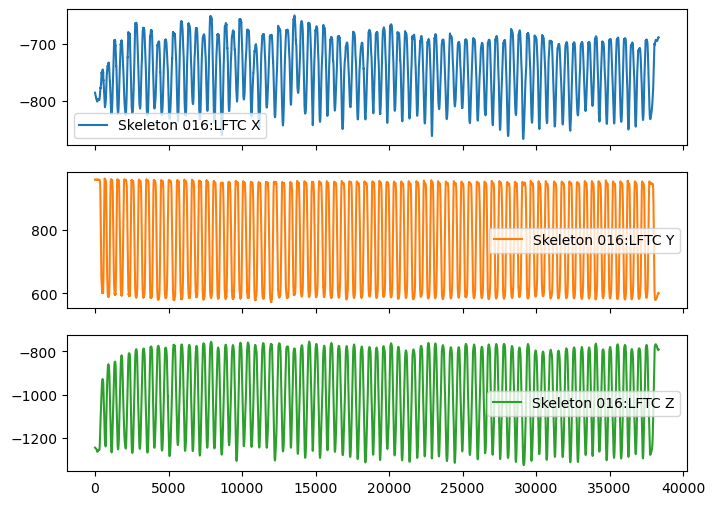

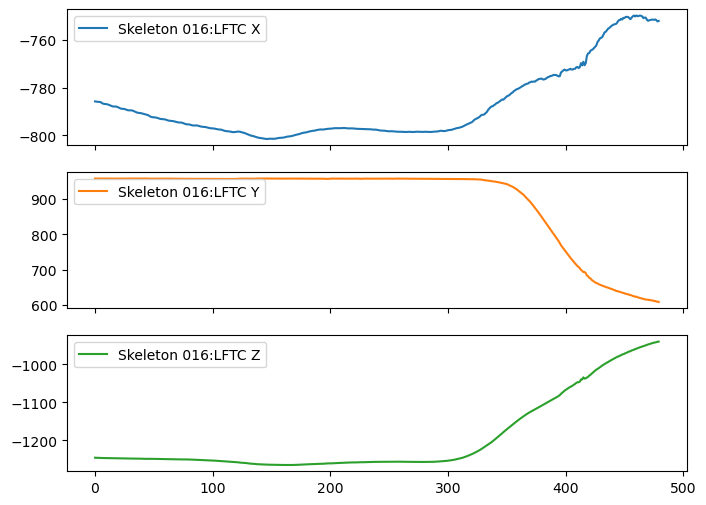

In [5]:
plot_cols = ['Skeleton 016:LFTC X','Skeleton 016:LFTC Y','Skeleton 016:LFTC Z']
plot_features = df[plot_cols]
plot_features.index = df.index
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = df.index[:480]
_ = plot_features.plot(subplots=True)

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Skeleton 016:LFTC X,38342.0,-744.728431,53.424741,-867.311218,-793.342316,-736.805390,-696.810837,-649.739075
Skeleton 016:LFTC Y,38342.0,780.436350,153.356493,572.567627,605.048248,804.293824,945.127747,961.665833
Skeleton 016:LFTC Z,38342.0,-1005.075478,182.873821,-1326.256592,-1183.185028,-998.521728,-809.452286,-754.265808


Text(0, 0.5, 'Movimento Y')

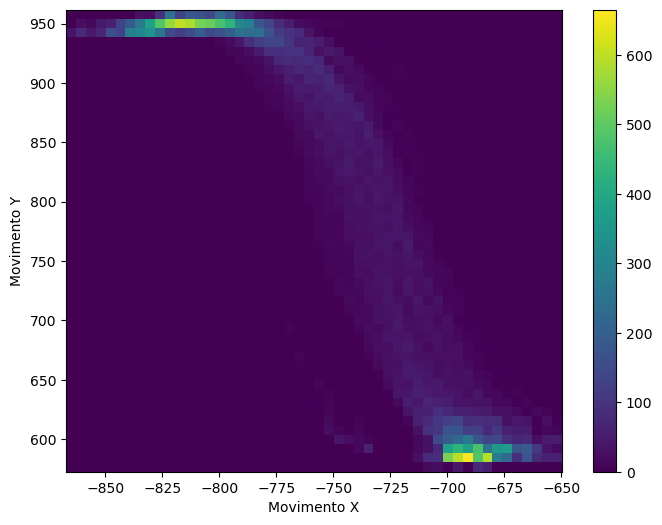

In [9]:
plt.hist2d(df['Skeleton 016:LFTC X'], df['Skeleton 016:LFTC Y'], bins=(50, 50) )
plt.colorbar()
plt.xlabel('Movimento X')
plt.ylabel('Movimento Y')

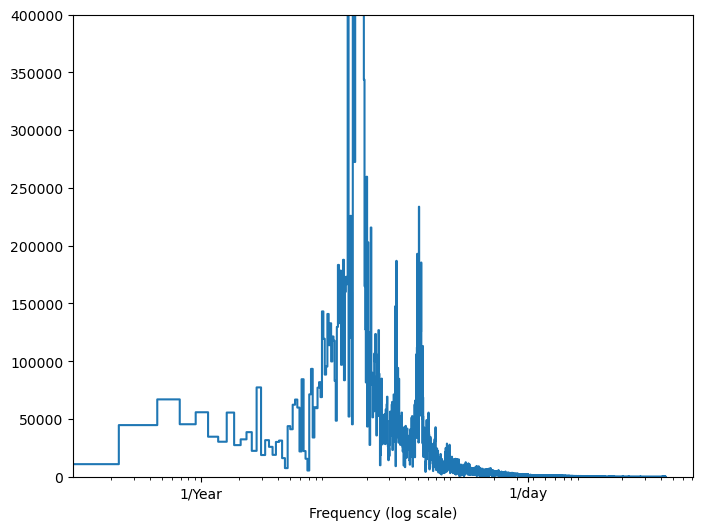

In [13]:
fft = tf.signal.rfft(df['Skeleton 016:LFTC Y'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['Skeleton 016:LFTC Y'])
FRAME = 24*365.2524
years_per_dataset = n_samples_h/(FRAME)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')